# 🗂️ **Práctica 08: Clasificación de Texto** 📎
----

## <b>T</b><b>e</b><b>a</b><b>m</b>: <font color='red'><b>S</b></font><b>ocios</b> <font color='blue'><b>I</b></font><b>nteligentemente</b> <font color='green'><b>A</b></font><b>rtificiales</b> (<font color='red'><b>S</b></font>.<font color='blue'><b>I</b></font>.<font color='green'><b>A</b></font>)

<font color='yellow'>▼</font> **Araujo Chávez Mauricio**

<font color='blue'>♥</font> **Bonilla Reyes Dafne**

<font color='red'>♦</font> **Castañón Maldonado Carlos Emilio**

<span style="color:#3498DB">❖</span> **Clemente Herrera Karla**

<font color='purple'>♠</font> **Mares Cruz Tlacaelel Horacio**

<font color='green'>♣</font> **Navarro Santana Pablo César**

In [1]:
# En caso de no tener instalado lo anterior, instalar con:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !pip install seaborn
# !pip install -U scikit-learn

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

import sklearn as sk
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

%matplotlib inline

### **Cargamos los datos**

In [2]:
path = './data/dataset.csv'

### **Leemos los datos del CSV**

In [3]:
# Leemos el archivo
pd.read_csv(path, encoding='latin-1')

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...
...,...,...
20343,ham,/ban
20344,ham,/ban
20345,ham,/ban
20346,ham,Kaisi hii


### **Creamos un Data Frame del CSV**

In [4]:
msjs_DataFrame = pd.read_csv(path, encoding='latin-1')

### **Obtenemos los tipos de Datos del CSV**

In [5]:
msjs_DataFrame.dtypes

text_type    object
text         object
dtype: object

### **Visualizamos las columnas del CSV**

In [6]:
msjs_DataFrame.columns

Index(['text_type', 'text'], dtype='object')

### **Ejemplo de la obtencion de Datos de alguna de las columnas del CSV**

In [7]:
# Probamos nuestro ejemplo con la columna 'text_type'
pd.unique(msjs_DataFrame['text_type'])

array(['spam', 'ham'], dtype=object)

In [8]:
# Probamos otro ejemplo con la columna 'text'
pd.unique(msjs_DataFrame['text'])

array(['naturally irresistible your corporate identity lt is really hard to recollect a company the market is full of suqgestions and the information isoverwhelminq but a good catchy logo stylish statlonery and outstanding website will make the task much easier we do not promise that havinq ordered a iogo your company will automaticaily become a world ieader it isguite ciear that without good products effective business organization and practicable aim it will be hotat nowadays market but we do promise that your marketing efforts will become much more effective here is the list of clear benefits creativeness hand made original logos specially done to reflect your distinctive company image convenience logo and stationery are provided in all formats easy to use content',
       'the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or continuant clothesman no l

### **Obtenemos mas informacion con describe**

In [9]:
msjs_DataFrame['text_type'].describe()

count     20348
unique        2
top         ham
freq      14337
Name: text_type, dtype: object

In [10]:
msjs_DataFrame['text'].describe()

count                                                 20348
unique                                                20334
top       SPAM ALERT  ð  User:     Username: @DillyBu...
freq                                                      8
Name: text, dtype: object

<Axes: xlabel='text_type'>

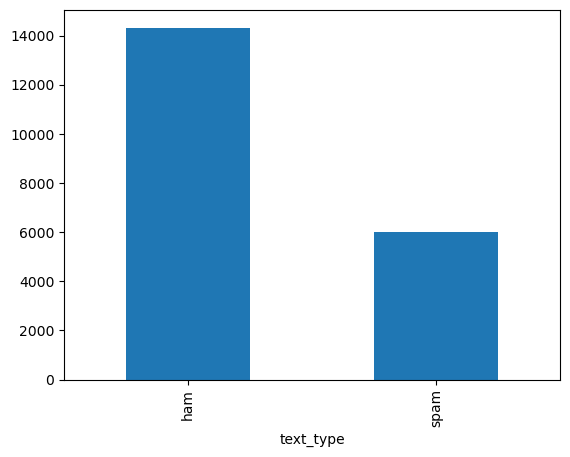

In [11]:
'''
Utiliza value_counts() para verificar si el dataset está balanceado.
Para obtener una mejor visualización del balance, usa además un gráfico de barras
para mostrar estos datos.
'''

msjs_DataFrame['text_type'].value_counts()

msjs_DataFrame['text_type'].value_counts().plot(kind='bar')


### **Tecnicas para resolver el desbalanceo de clases**

- **Ajuste de Parámetros del modelo:** Consiste en ajustar parametros ó metricas del propio algoritmo para intentar equilibrar a la clase minoritaria penalizando a la clase mayoritaria durante el entrenamiento. Ejemplos on ajuste de peso en árboles, también en logisticregression tenemos el parámetro class_weight= “balanced” que utilizaremos en este ejemplo. No todos los algoritmos tienen estas posibilidades. En redes neuronales por ejemplo podríamos ajustar la métrica de Loss para que penalice a las clases mayoritarias.

- **Modificar el Dataset:** podemos eliminar muestras de la clase mayoritaria para reducirlo e intentar equilibrar la situación. Tiene como “peligroso” que podemos prescindir de muestras importantes, que brindan información y por lo tanto empeorar el modelo. Entonces para seleccionar qué muestras eliminar, deberíamos seguir algún criterio. También podríamos agregar nuevas filas con los mismos valores de las clases minoritarias, por ejemplo cuadriplicar nuestras 492 filas. Pero esto no sirve demasiado y podemos llevar al modelo a caer en overfitting.

- **Muestras artificiales:** podemos intentar crear muestras sintéticas (no idénticas) utilizando diversos algoritmos que intentan seguir la tendencia del grupo minoritario. Según el método, podemos mejorar los resultados. Lo peligroso de crear muestras sintéticas es que podemos alterar la distribución “natural” de esa clase y confundir al modelo en su clasificación.

- **Balanced Ensemble Methods:** Utiliza las ventajas de hacer ensamble de métodos, es decir, entrenar diversos modelos y entre todos obtener el resultado final (por ejemplo “votando”) pero se asegura de tomar muestras de entrenamiento equilibradas.

**Fuente:** https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

### **Preparación de datos**


In [ ]:
'''
- Limpia los datos eliminando caracteres especiales.
- Limpia los datos convirtiendo los textos a minúsculas para uniformidad.
- Divide los textos en tokens individuales con 
- Elimina stopwords (palabras comunes que no aportan mucho significado
al texto).

- Convierte los textos limpios en vectores numéricos utilizando CountVec-
torizer o TfidfVectorizer.

- Utiliza train_test_split para dividir el conjunto de datos en dos: 
un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
'''

import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

'''
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    return text
'''

def clean_text(text):
    if not text:
        return ''
    
    # Remover caracteres no ASCII
    text = ''.join([char if ord(char) < 128 else ' ' for char in text])

    # Remover caracteres especiales y convertir a minúsculas
    text = re.sub(r'[^a-z\s$]', '', text.lower())
    
    # Remover espacios adicionales
    text = re.sub(r'\s+', ' ', text).strip()

    # Remover stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Removemos cualquier caracter no alfabetico
    text = re.sub(r'[^a-z\s]', '', text)

    return text

msjs_DataFrame['text'] = msjs_DataFrame['text'].apply(clean_text)

msjs_DataFrame['text']

X = msjs_DataFrame['text']
y = msjs_DataFrame['text_type']

# Utiliza train_test_split para dividir el conjunto de datos en dos: 
# un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


### **Creación del modelo de Regresión Logística y Ejecución**

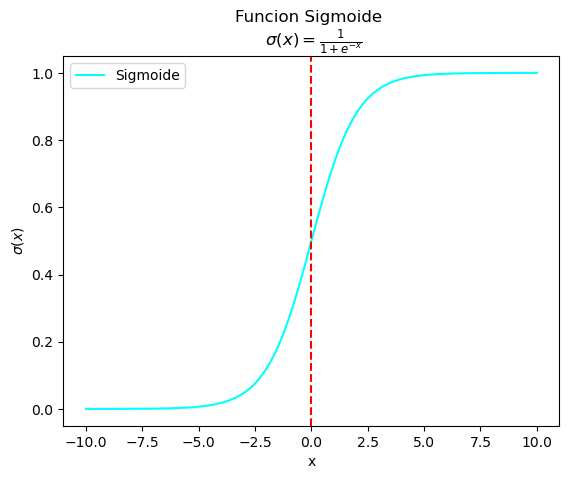

In [13]:
sig = lambda x: 1./(1.+np.exp(-x))
x = np.linspace(-10, 10, 100)
plt.plot(x, sig(x), label='Sigmoide', color='cyan')
plt.title('Funcion Sigmoide \n $\sigma (x) = \\frac{1}{1+e^{-x}}$')
plt.xlabel('x')
plt.ylabel('$\sigma (x)$')
plt.legend()

# Ahora dibujamos una linea roja en x=0
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

Predicciones:  [0 0 0 ... 1 0 1]
Valores reales:  [0 0 0 ... 1 0 1]
F1 Score:  0.927549143241514
Coeficientes:  [[-0.12480488 -0.11926114 -0.00406662 ...  0.33315339 -0.00147424
  -0.05726096]]
Intercepto:  [-1.61627947]
Matriz de confusion: 
[[2829   61]
 [ 227  953]]
Precision:  0.9292383292383293


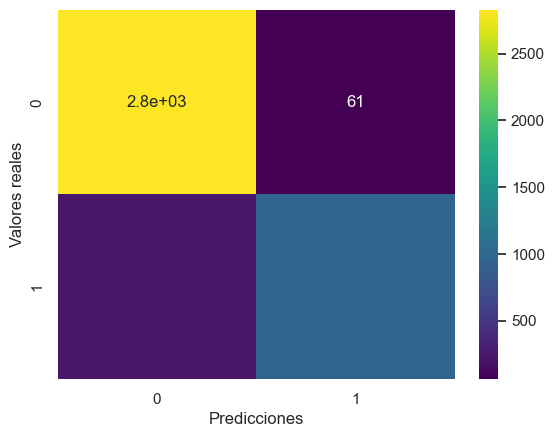

(array([[2829,   61],
        [ 227,  953]], dtype=int64),
 0.9292383292383293)

In [16]:
# import matplotlib.pyplot as plt
# Configurar la fuente
# plt.rcParams['font.family'] = 'DejaVu Sans'

def read_data(path):
    '''
    Funcion para leer los datos, obtener su formato correcto y dividirlos en entrenamiento y prueba.
    '''
    # Leemos el archivo
    data = pd.read_csv(path, encoding='latin-1')
    
    # Normalizamos los datos
    # data = (data - data.mean()) / data.std()

    # Eliminamos las filas que tangan valores nulos
    data = data.dropna()

    # Dividimos los datos en entrenamiento y prueba
    # train_data, test_data = train_test_split(data, test_size=0.2)
    train_data, test_data = train_test_split(data, test_size=0.2) 
    return train_data, test_data


def train_model(train_data, epochs):
    X = train_data['text']
    X = vectorizer.transform(X)
    y = train_data['text_type']
    # Definimos el umbral de la sigmoide en y
    if y.dtype == 'object':
        y = np.where(y == 'spam', 1, 0)
    y = np.array(y)

    model = sk.linear_model.LogisticRegression(max_iter=epochs)
    model.fit(X, y)


    return model




def evaluate_model(model, test_data):
    '''
    Funcion para evaluar el modelo de regresion logistica.
    '''
    # Definimos la variable independiente
    X = test_data['text']
    X = vectorizer.transform(X)

    # Definimos la variable dependiente
    y = test_data['text_type']


    # Definimos el umbral de la sigmoide en y
    if y.dtype == 'object':
        y = np.where(y == 'spam', 1, 0)

    y = np.array(y)

    
    y_pred = model.predict(X)
    # Revisamos las predicciones y comparamoslas con los valores reales
    print('Predicciones: ', y_pred)
    print('Valores reales: ', y)

    print('F1 Score: ', f1_score(y, y_pred, average='weighted'))

    return y_pred, y

'''
def plot_data(train_data, test_data):
    
    # Funcion para graficar los datos.
    
    # Graficamos los datos de entrenamiento
    plt.scatter(train_data['text_type'], train_data['text'], label='Entrenamiento', color='blue')


    # Graficamos los datos de prueba
    plt.scatter(test_data['text_type'], test_data['text'], label='Prueba', color='red')


    plt.xlabel('text_type')
    plt.ylabel('text')
    plt.legend()
    plt.show()
'''

def confusion_Matrix(y_pred, y):
    '''
    Funcion para calcular la matriz de confusion.
    '''
    # Calculamos la matriz de confusion
    cm = sk.metrics.confusion_matrix(y, y_pred)
    print('Matriz de confusion: ')
    print(cm)

    # Calculamos la precision del modelo
    accuracy = sk.metrics.accuracy_score(y, y_pred)
    print('Precision: ', accuracy)

    # Calculamos la matriz de confusion y la graficamos
    #cm = sk.metrics.confusion_matrix(y, y_pred)
    #plt.figure(figsize=(5, 5))
    sns.set_theme(font_scale=1, palette='viridis', style='whitegrid'  )
    sns.heatmap(cm, annot=True ,cmap='viridis')
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.show()

    return cm, accuracy

train_data, test_data = read_data('./data/dataset.csv')
model = train_model(train_data, 1000)

y_pred, y = evaluate_model(model, test_data)

# Revisamos los coeficientes de las variables
print('Coeficientes: ', model.coef_)
print('Intercepto: ', model.intercept_)



# plot_data(train_data, test_data)

confusion_Matrix(y_pred, y)


### **Creación del modelo de Support Vector Machine (SVC) y Ejecución**

In [ ]:
# TODO

### **Creación del modelo de Decision Tree Classifier (Decision Tree) y Ejecución**

In [ ]:
# TODO

### **Creación del modelo de Random Forest Classifier (Random Forest) y Ejecución**

In [ ]:
# TODO